In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation

In [2]:
df1 = pd.read_csv("data1.csv")
df2 = pd.read_csv("data2.csv")
df1.head()

,Unnamed: 0,motion_sensor1,motion_sensor2,motion_sensor3,motion_sensor4,motion_sensor5,motion_sensor6,camera1,camera2,camera3,...,r28,r29,r30,r31,r32,r33,r34,c1,c2,outside
0,0,no motion,no motion,no motion,no motion,motion,motion,0,0,0,...,0,0,0,0,0,0,0,0,0,40
1,1,no motion,motion,no motion,no motion,motion,no motion,0,0,0,...,0,0,0,0,0,0,0,0,0,40
2,2,no motion,no motion,no motion,motion,no motion,no motion,0,0,0,...,0,0,0,0,0,0,0,1,0,39
3,3,no motion,motion,no motion,no motion,no motion,no motion,0,0,0,...,0,0,0,0,0,0,0,0,0,37
4,4,no motion,motion,no motion,no motion,no motion,no motion,0,0,0,...,0,0,0,0,0,0,0,1,0,38


In [3]:
# Getting the dataframe representing the true number of people in each room
trueDataCols = ['r' + str(i) for i in range(1, 35)] + ['c1', 'c2'] + ['outside']
pop1 = df1[trueDataCols]
pop2 = df2[trueDataCols]
pop1.head()

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,...,r28,r29,r30,r31,r32,r33,r34,c1,c2,outside
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,39
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,37
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,38


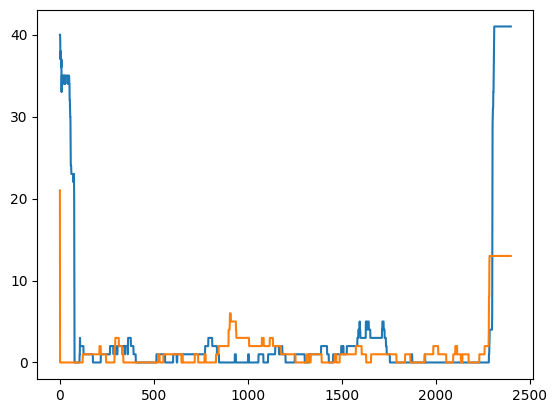

In [4]:
# Plot of how many people are outside on both days. These look similar in shape, and 
# make sense. We can probably assume that both datasets are taken from 8am-6pm (df1 was used for that timeframe in example_test.py)
plt.plot(pop1['outside'])
plt.plot(pop2['outside']);

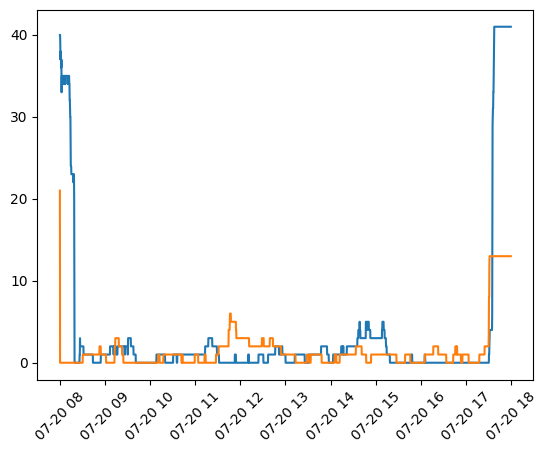

In [5]:
# Add in this timedata as a column for the dataframes
timePeriod = pd.date_range(start='08:00', end='18:00', freq='15s', inclusive='left')
pop1.index = timePeriod
pop2.index = timePeriod
plt.plot(pop1['outside'])
plt.plot(pop2['outside'])
plt.xticks(rotation=45);

In [8]:
pop1.head()

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,...,r28,r29,r30,r31,r32,r33,r34,c1,c2,outside
2024-07-20 08:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40
2024-07-20 08:00:15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40
2024-07-20 08:00:30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,39
2024-07-20 08:00:45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,37
2024-07-20 08:01:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,38


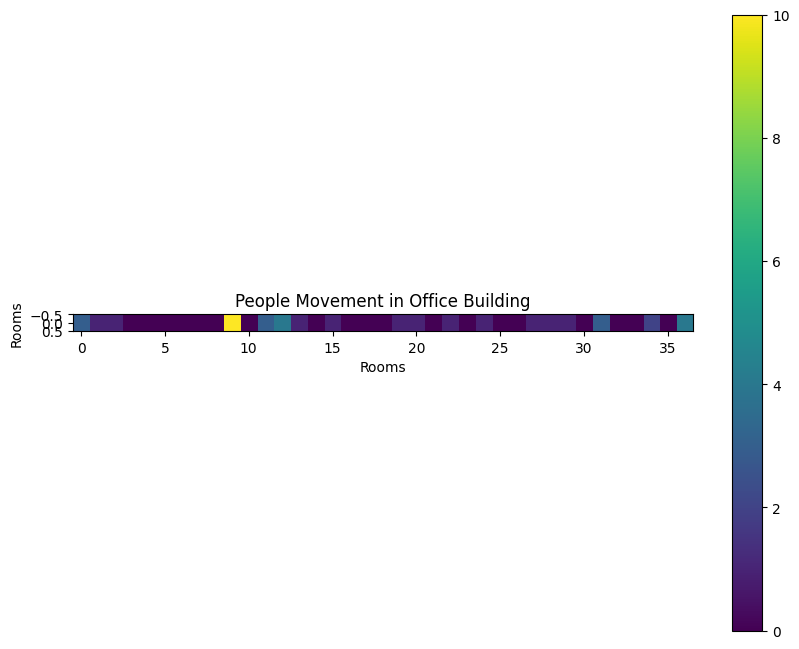

In [15]:
# Epic animated heatmap visualisation (thanks ChatGPT)
# I need to install ffmpeg (run "sudo apt install ffmpeg") for this to work (as well as all the python packages with pip)
# Also, be judicious with choosing start and end times - this takes a while to run 

# Create the heatmap video over the period from start to end, using every Nth datapoint.
start, end = 400, 1600
everyNth = range(start, end, 10)
df = pop1.iloc[everyNth,]
floorDims = (1, 37)

def update_heatmap(frame_num, df, heatmap):
    data = df.iloc[frame_num].values.reshape(floorDims)  # Adjust reshape as per your floor plan
    heatmap.set_data(data)
    return [heatmap]

# Create figure and initial heatmap
fig, ax = plt.subplots(figsize=(10, 8))
data = df.iloc[0].values.reshape(floorDims)  # Adjust reshape as per your floor plan
heatmap = ax.imshow(data, cmap='viridis', vmin=0, vmax=10)

# Add colorbar and labels
plt.colorbar(heatmap)
ax.set_title('People Movement in Office Building')
ax.set_xlabel('Rooms')
ax.set_ylabel('Rooms')

# Create animation
ani = animation.FuncAnimation(fig, update_heatmap, frames=len(df), fargs=(df, heatmap), interval=200, blit=True)

# Save or display the animation
ani.save('people_movement.mp4', writer='ffmpeg')
plt.show()

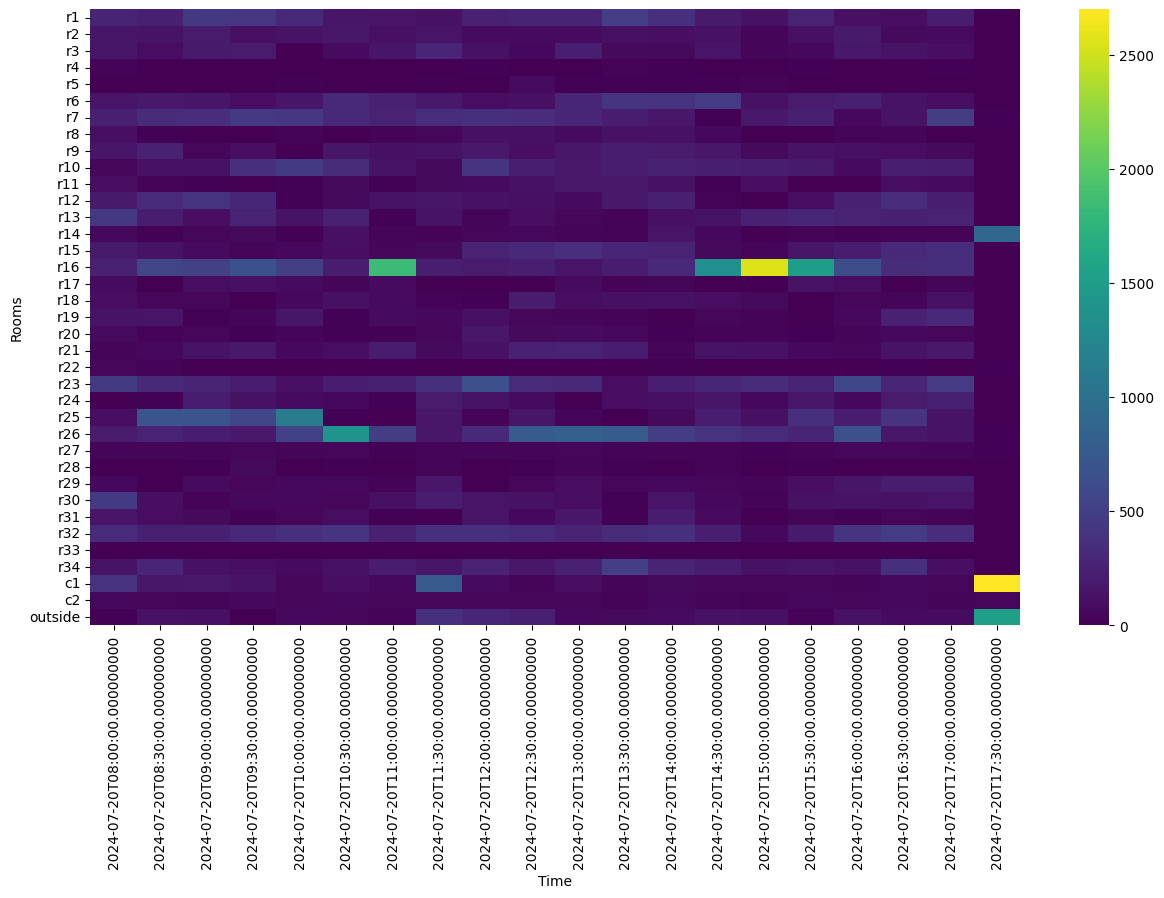

In [29]:
# Aggregate data by hour to identify peak times
resampled = pop2.resample('30min').sum()

# Plot heatmaps of room occupancy
plt.figure(figsize=(15, 8))
sns.heatmap(resampled.T, cmap='viridis')
plt.xlabel('Time')
plt.ylabel('Rooms')
plt.show()

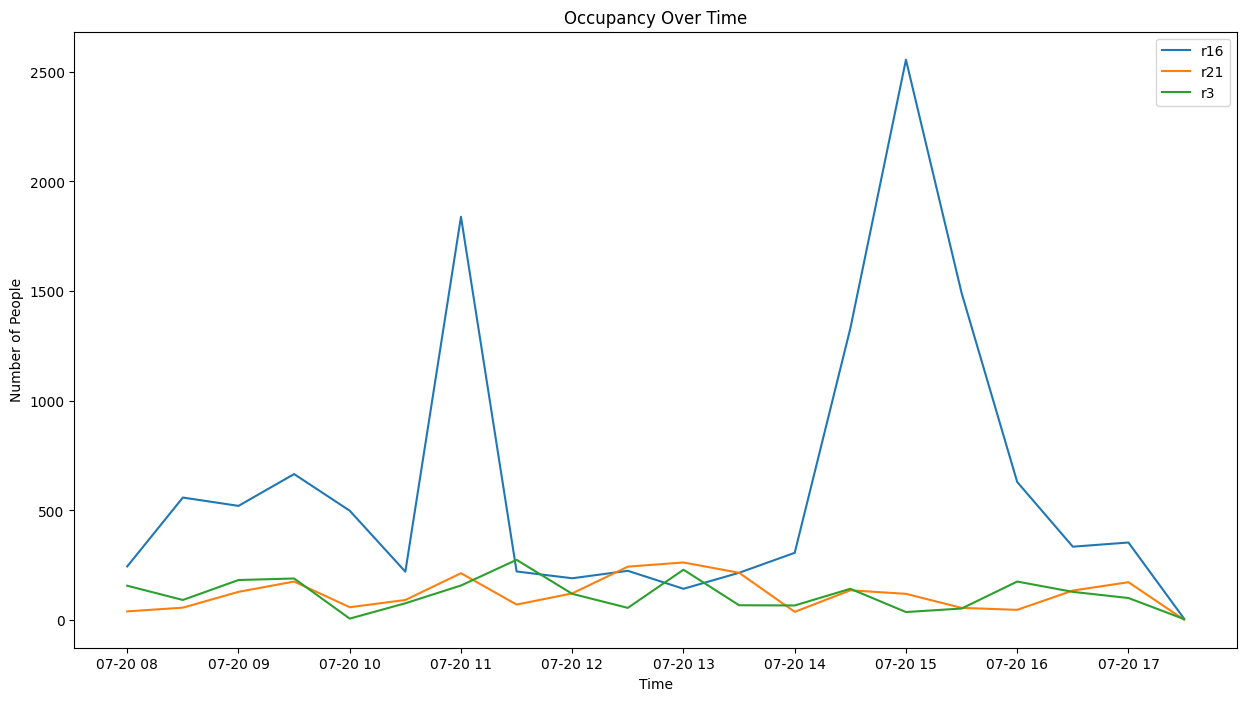

In [31]:
# Plot line plots for specific rooms
plt.figure(figsize=(15, 8))
for room in ['r16', 'r21', 'r3']: # resampled.keys(): # ['r16', 'r2', 'r3']:  # Adjust room selection as needed
    plt.plot(resampled.index, resampled[room], label=room)
plt.title('Occupancy Over Time')
plt.xlabel('Time')
plt.ylabel('Number of People')
plt.legend()
plt.show()

In [ ]:
# Create a transition matrix
# Assuming df contains a column 'current_room' with room IDs
transitions = pd.crosstab(df['previous_room'], df['current_room'], normalize='index')

# Plot transition matrix
plt.figure(figsize=(12, 10))
sns.heatmap(transitions, cmap='viridis')
plt.title('Room Transition Matrix')
plt.xlabel('Next Room')
plt.ylabel('Previous Room')
plt.show()
